# Минипроект №3.

## Задачи

* Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
* Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
* Сколько транзакций завершились ошибкой?
* Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
* Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
* Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
* Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

#### Описание данных:

##### Имеются следующие данные:
* date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* name – имя пользователя
* transaction – статус транзакции

### Задача №1.
Загрузите датасет **transaction_data.csv**. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
Вопрос: сколько в датасете пропущенных значений?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
transactions = pd.read_csv('C:/Users/79196/Projects/data/transaction_data.csv')
transactions.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [3]:
transactions.isna().sum()

date           0
name           0
transaction    0
dtype: int64

### Задача №2.
Проверьте, какие значения принимает колонка **transaction**? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.
Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

**Ответ:** 0 пропущенных значений 

In [4]:
quantity_transaction = transactions.groupby('transaction', as_index=False) \
                                   .agg({'name':'count'}) \
                                   .sort_values('name', ascending=False) \
                                   .rename(columns={'name':'quantity'}) 
quantity_transaction

,transaction,quantity
2,successfull,3692
0,cancelled,1619
1,error,4


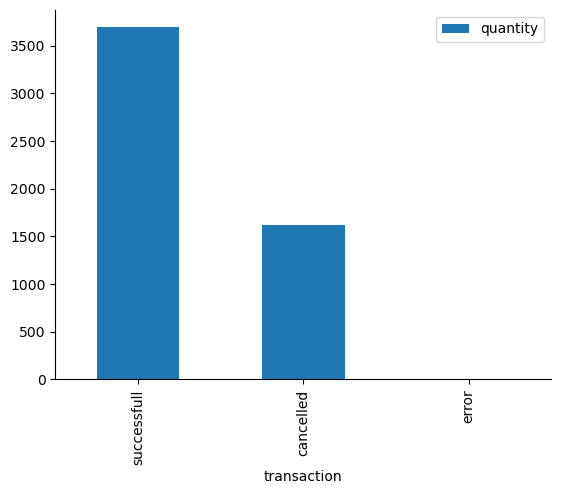

In [5]:
quantity_transaction.plot.bar(x='transaction', y='quantity')
sns.despine()

**Ответ:** 
1. successfull
2. cancelled
3. error

### Задача №3.
Подумайте, хорош ли полученный график?
* Да, это просто график мечты!
* Плохо видно число наблюдений у некоторых значений
* У графика неправильно подписаны оси
* На барплоте не может быть квалитативных переменных

**Ответ:**
* Плохо видно число наблюдений у некоторых значений

### Задача №4.
Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением **successfull**. Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

- по оси x – число транзакций
- по оси y – доля пользователей с таким числом транзакций

Выберите верные утверждения:
1. Пользователи в среднем совершили примерно по 66 транзакций     
2. Максимальное число транзакций – 82                             
3. Пользователи в среднем совершили по 64 транзакции
4. Примерно 25% пользователей совершили менее 61 транзакции       
5. Примерно 25% пользователей совершили более 61 транзакции
6. Пользователи в среднем совершили примерно по 56 транзакций
7. Максимальное число транзакций – 112
8. Пользователи в среднем совершили примерно по 94 транзакции

In [6]:
successfull_transactions = transactions.query('transaction == "successfull"') \
                                       .groupby('name', as_index=False) \
                                       .agg({'transaction':'count'}) \
                                       .rename(columns={'transaction':'quantity_successfull'}) \
                                       .sort_values('quantity_successfull', ascending=False)
successfull_transactions

,name,quantity_successfull
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78
33,Masha_Polyanova,78
6,Ekaterina_Smirnova,77
22,Lolita_Ivanova,76
9,Irina_Lesnova,76
10,Irina_Ozerova,76


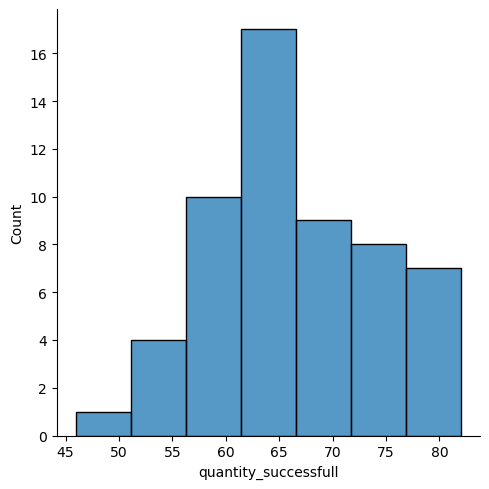

In [7]:
sns.displot(successfull_transactions.quantity_successfull)

**Ответ:**  Правильные пункты 1,2,4,

In [8]:
successfull_transactions.quantity_successfull.mean()

65.92857142857143

In [9]:
successfull_transactions.quantity_successfull.quantile(q=0.25) 

61.0

In [10]:
successfull_transactions.quantity_successfull.max()

82

**Ответ:**
1. Пользователи в среднем совершили примерно по 66 транзакций     
2. Максимальное число транзакций – 82 
4. Примерно 25% пользователей совершили менее 61 транзакции       

### Задача №5.
К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

- столбцы – имена пользователей
- строки – минута времени осуществления операции (minute)
- значения – число совершённых операций
Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [11]:
transactions_updated = pd.read_csv('C:/Users/79196/Projects/data/transaction_data_updated.csv', parse_dates=['date'])
transactions_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [12]:
user_vs_minute_pivot = transactions_updated.groupby(['name', 'minute'], as_index=False) \
                                           .agg({'transaction':'count'}) \
                                           .pivot(index='minute', columns='name', values='transaction') \
                                           .reset_index() \
                                           .fillna(0) 
user_vs_minute_pivot                    

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0


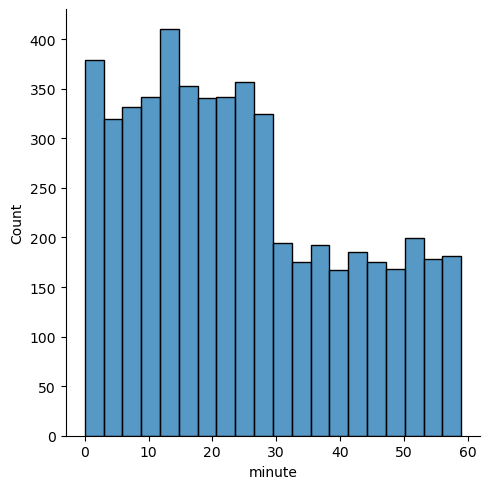

In [13]:
sns.displot(transactions_updated.minute)

### Задача №6.
Исправьте ошибку коллеги (Извлекли минутную часть времени, а не число минут с начала дня), 
и посчитайте число минут, прошедших с начала дня. 
Результат сохраните в колонку **true_minute**.

In [14]:
transactions_updated['true_minute'] = transactions_updated.date.dt.minute + \
                                      transactions_updated.date.dt.hour*60
transactions_updated

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


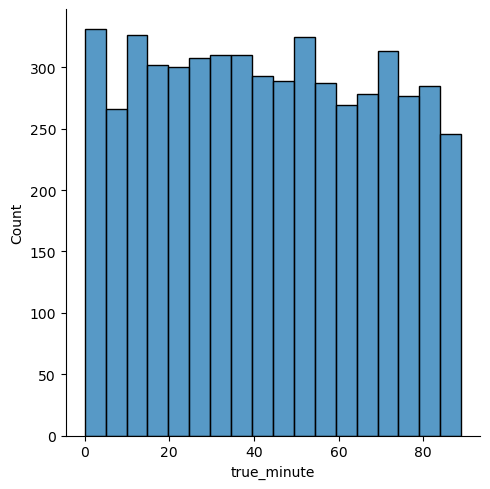

In [15]:
sns.displot(transactions_updated.true_minute)